Challenge: ccv1  
# Deep Learning: Was versteckt sich da?  
## Demo Modell
In diesem Notebook können Bilder mit unterschiedlichen Megadetector Threshold mit dem Modell getestet werden

In [12]:
import os
print(os.getcwd())
if os.getcwd().endswith("demo"):
    os.chdir("..")
import ast
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.transforms as transforms
from src.evaluation import Animal
from torchvision import models
from torch import nn
import torch
from PIL import Image, ImageEnhance
from src.augmentation import CCV1Transformer,None_Transform
from src import modelling
os.chdir("demo")

c:\Users\j\gitlab\tierli_ahluege\demo


 ## Test Bild
 Bilder werden zufällig aus dem `demo_images` Ordner geladen. (ggf. random.seed() kommentieren für verschiedene Bilder)

'image_high_th_3_ZJ018837'

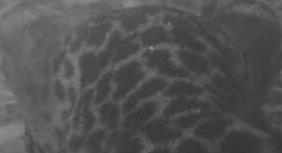

In [14]:
random.seed(14)

folder_path = './demo_images'
images = os.listdir(folder_path)

random_image_name = random.choice(images)
random_image_path = os.path.join(folder_path, random_image_name)
random_image = Image.open(random_image_path)
display(random_image_name[:-4])
display(random_image)

## Demo Modell

In [15]:
# load modell

# predict animal class
class pred_images():
    def __init__(self,mega_range:str) -> None:
        self.transformer = pred_images.preprocessing()
        if mega_range=="high":
            pass
        elif mega_range=="medium":
            pass
        elif mega_range=="low":
            pass
        else:
            print("possible mega ranges are: 'high','medium','low'")
            raise ValueError
    @staticmethod
    def preprocessing(pretrained_model:str="convnext"):
        model_transformer = CCV1Transformer(
            transforms.Compose([None_Transform()]), "model_specific", pretrained_model
        ).getCompose(True)
        return model_transformer

In [19]:
pred = pred_images("high")

In [20]:
image_prep = pred.transformer(random_image)

In [22]:
def convnext_tiny_():
    model = models.convnext_tiny(weights=None,)
    model.classifier[2] =nn.Linear(in_features=768, out_features=8, bias=True)
    return model

In [26]:
model = convnext_tiny_()
model.load_state_dict(torch.load('../model_submit/convnext_tiny_1epoch.pth'))
#model.eval()

<All keys matched successfully>

In [28]:
class predict_model(modelling.CCV1_Trainer):
    def __init__(self):
        self.device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [29]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
preds = predict_model().predict(model=model.to(device),data_loader=[{"image":image_prep.view(1,3, 224, 224).to(device)}])

In [30]:
torch.softmax(torch.from_numpy(preds[0]), dim=1)

tensor([[1.2921e-04, 4.7008e-05, 3.2464e-03, 2.1934e-04, 2.2015e-04, 9.9593e-01,
         8.3204e-05, 1.2300e-04]], dtype=torch.float64)